In [52]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import h5py
from testCases_v4 import *
# from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward
from dnn_utils import *
import scipy
from PIL import Image
from scipy import ndimage
import time

%matplotlib inline

# %load_ext autoreload
# %autoreload 2

# np.random.seed(1)

In [134]:
# 初始化参数
def initialize_params(layer_dims):
    params = {}
    
    L = len(layer_dims)
    
    for i in range(1, L):
        params["W" + str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1]) * 0.2  # 注意 乘以0.01 梯度不下降（梯度消失）， 乘以0.3 梯度正常下降， 初始化参数很重要，思考
#         params["W" + str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1]) * np.sqrt(2 / layer_dims[i-1])  # Xavier 效果很好 一定程度解决梯度消失、爆炸问题
        params["b" + str(i)] = np.zeros((layer_dims[i], 1))
        
        assert(params["W" + str(i)].shape == (layer_dims[i], layer_dims[i-1]))
        assert(params["b" + str(i)].shape == (layer_dims[i], 1))
    
    return params

In [135]:
# 正向传播
def forward_prop(X, params):
    L = len(params) // 2
    caches = {}
    caches["A0"] = X
#     print(caches["A0"].shape)
    for i in range(1, L):
        caches["Z" + str(i)] = np.dot(params["W" + str(i)], caches["A" + str(i-1)]) + params["b" + str(i)]
#         print(caches["Z" + str(i)].shape)   # debug
        caches["A" + str(i)] = relu(caches["Z" + str(i)])[0]  # 注意relu返回两个值
#         caches["A" + str(i)] = np.maximum(0, caches["Z" + str(i)])
#         print(caches["A" + str(i)].shape)   # debug
    
    caches["Z" + str(L)] = np.dot(params["W" + str(L)], caches["A" + str(L-1)]) + params["b" + str(L)]
    caches["A" + str(L)] = sigmoid(caches["Z" + str(L)])[0]
#     caches["A" + str(L)] = 1 / (1 + np.exp(-caches["Z" + str(L)]))
    
    AL = caches["A" + str(L)]
    
    assert(AL.shape == (1, X.shape[1]))
    
    return AL, caches

In [136]:
# X, params = L_model_forward_test_case_2hidden()
# AL, caches = forward_prop(X, params)
# print("AL = " + str(AL))
# print("Length of caches list = " + str(len(caches)))

In [137]:
# 代价函数
def cost_fun(AL, Y):
    m = Y.shape[1]
    
    cost = (-1/m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1-Y), np.log(1-AL)))
    
    cost = np.squeeze(cost)
    
    return cost

In [138]:
# Y, AL = compute_cost_test_case()

# print("cost = " + str(cost_fun(AL, Y)))

In [139]:
# def linear_backward(dZ, A_pre, W, b):
#     """
#     Implement the linear portion of backward propagation for a single layer (layer l)


#     Returns:
#     dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
#     dW -- Gradient of the cost with respect to W (current layer l), same shape as W
#     db -- Gradient of the cost with respect to b (current layer l), same shape as b
#     """
#     m = A_pre.shape[1]

#     ### START CODE HERE ### (≈ 3 lines of code)
#     dW = (1/m) * np.dot(dZ, A_pre.T)
#     db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
#     dA_prev = np.dot(W.T, dZ)
#     ### END CODE HERE ###
    
#     assert (dA_prev.shape == A_pre.shape)
#     assert (dW.shape == W.shape)
#     assert (db.shape == b.shape)
    
#     return dA_prev, dW, db

In [140]:
# def linear_activation_backward(dA, Z, A_pre, W, b, activation):
#     """
#     Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
#     Arguments:
#     dA -- post-activation gradient for current layer l 
#     cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
#     activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
#     Returns:
#     dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
#     dW -- Gradient of the cost with respect to W (current layer l), same shape as W
#     db -- Gradient of the cost with respect to b (current layer l), same shape as b
#     """
#     if activation == "relu":
#         ### START CODE HERE ### (≈ 2 lines of code)
#         dZ = relu_backward(dA, Z)
#         dA_prev, dW, db = linear_backward(dZ, A_pre, W, b)
#         ### END CODE HERE ###
        
#     elif activation == "sigmoid":
#         ### START CODE HERE ### (≈ 2 lines of code)
#         dZ = sigmoid_backward(dA, Z)
#         dA_prev, dW, db = linear_backward(dZ, A_pre, W, b)
#         ### END CODE HERE ###
    
#     return dA_prev, dW, db

In [141]:
# def backward_prop(params, caches, Y):
#     """
#     Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
#     Arguments:
#     AL -- probability vector, output of the forward propagation (L_model_forward())
#     Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
#     caches -- list of caches containing:
#                 every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
#                 the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
#     Returns:
#     grads -- A dictionary with the gradients
#              grads["dA" + str(l)] = ... 
#              grads["dW" + str(l)] = ...
#              grads["db" + str(l)] = ... 
#     """
#     grads = {}
#     L = len(params) // 2
#     AL = caches["A" + str(L)]
#     m = AL.shape[1]
#     Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
#     # Initializing the backpropagation
#     ### START CODE HERE ### (1 line of code)
#     dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) 
#     ### END CODE HERE ###
    
#     # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
#     ### START CODE HERE ### (approx. 2 lines)
#     grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, caches["Z" + str(L)], caches["A" + str(L-1)], params["W" + str(L)], params["b" + str(L)], 'sigmoid')
#     ### END CODE HERE ###
    
#     # Loop from l=L-2 to l=0
#     for l in reversed(range(L-1)):
#         # lth layer: (RELU -> LINEAR) gradients.
#         # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
#         ### START CODE HERE ### (approx. 5 lines)
       
#         dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], caches["Z" +str(l+1)], caches["A" + str(l)], params["W" + str(l+1)], params["b" + str(l+1)], 'relu')
#         grads["dA" + str(l)] = dA_prev_temp
#         grads["dW" + str(l + 1)] = dW_temp
#         grads["db" + str(l + 1)] = db_temp
#         ### END CODE HERE ###

#     return grads

In [142]:
# 反向传播
def backward_prop(params, caches, Y):
    grads = {}
    L = len(params) // 2
#     print(L)
    m = Y.shape[1]
    
    grads["dZ" + str(L)] = caches["A" + str(L)] - Y
#     dAL =  - (np.divide(Y, caches["A" + str(L)]) - np.divide(1 - Y, 1 - caches["A" + str(L)]))
#     grads["dZ" + str(L)] = sigmoid_backward(dAL, caches["Z" + str(L)])
    for i in range(L):
        grads["dW" + str(L-i)] = (1/m) * np.dot(grads["dZ" + str(L-i)], caches["A" + str(L-i-1)].T)
        grads["db" + str(L-i)] = (1/m) * np.sum(grads["dZ" + str(L-i)], axis=1, keepdims=True)
        if (i < L-1):
            grads["dA" + str(L-i-1)] = np.dot(params["W" + str(L-i)].T, grads["dZ" + str(L-i)])
            grads["dZ" + str(L-i-1)] = relu_backward(grads["dA" + str(L-i-1)], caches["Z" + str(L-i-1)])
        
    return grads

In [143]:
# def update_params(params, grads, learning_rate):
#     """
#     Update parameters using gradient descent
    
#     Arguments:
#     parameters -- python dictionary containing your parameters 
#     grads -- python dictionary containing your gradients, output of L_model_backward
    
#     Returns:
#     parameters -- python dictionary containing your updated parameters 
#                   parameters["W" + str(l)] = ... 
#                   parameters["b" + str(l)] = ...
#     """
    
#     L = len(params) // 2 # number of layers in the neural network

#     # Update rule for each parameter. Use a for loop.
#     ### START CODE HERE ### (≈ 3 lines of code)
#     for l in range(L):
#         params["W" + str(l+1)] = params['W' + str(l + 1)] - learning_rate * grads['dW' + str(l + 1)]
#         params["b" + str(l+1)] = params['b' + str(l + 1)] - learning_rate * grads['db' + str(l + 1)]
#     ### END CODE HERE ###
        
#     return params

In [144]:
# 构建模型
def dnn_model(X, Y, layer_dims, num_itera = 3000, learning_rate = 0.0075, print_cost = False):
    costs = []
    params = initialize_params(layer_dims)
    L = len(layer_dims)
    print(L)
    
    for i in range(num_itera):
        AL, caches = forward_prop(X, params)
        cost = cost_fun(AL, Y)
        grads = backward_prop(params, caches, Y)
        
        
#         params = update_params(params, grads, learning_rate)
        
        for l in range(1, L):
#             W = params["W" + str(l)]
# #             print(W.shape)
#             b = params["b" + str(l)]
# #             print(b.shape)
#             dW = grads["dW" + str(l)]
#             db = grads["db" + str(l)]
#             W = W - learning_rate * dW
#             b = b - learning_rate * db
#             params["W" + str(l)] = W
#             params["b" + str(l)] = b 
            
            params["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
            params["b" + str(l)] -= learning_rate * grads["db" + str(l)]
        
        if print_cost and (i % 100 == 0):
            costs.append(cost)
            print("Cost in iter %i is %f" % (i, cost))
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return params

In [145]:
# def load_data():
#     train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
#     train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
#     train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

#     test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
#     test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
#     test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

#     classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
#     train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
#     test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
#     return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [146]:
# 导入数据集
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


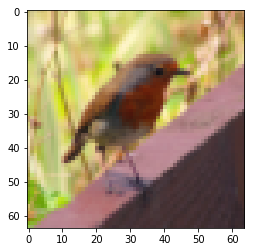

In [147]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [148]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [149]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [150]:
### CONSTANTS ###
# layer_dims = [12288, 20, 7, 5, 1] #  4-layer model
layer_dims = [12288, 20, 7, 5, 1]

In [151]:
# debug
# params = initialize_params(layer_dims)
# print(params["W3"].shape)
# AL, caches = forward_prop(train_x, params)
# print(caches)

5
Cost in iter 0 is 0.861724
Cost in iter 100 is 0.646926
Cost in iter 200 is 0.639546
Cost in iter 300 is 0.631797
Cost in iter 400 is 0.622522
Cost in iter 500 is 0.610992
Cost in iter 600 is 0.596134
Cost in iter 700 is 0.576709
Cost in iter 800 is 0.551397
Cost in iter 900 is 0.520414
Cost in iter 1000 is 0.485555
Cost in iter 1100 is 0.446440
Cost in iter 1200 is 0.402730
Cost in iter 1300 is 0.356789
Cost in iter 1400 is 0.309193
Cost in iter 1500 is 0.281821
Cost in iter 1600 is 0.248712
Cost in iter 1700 is 0.199596
Cost in iter 1800 is 0.147867
Cost in iter 1900 is 0.094174
Cost in iter 2000 is 0.068692
Cost in iter 2100 is 0.047369
Cost in iter 2200 is 0.034240
Cost in iter 2300 is 0.025483
Cost in iter 2400 is 0.019533
Cost in iter 2500 is 0.015389
Cost in iter 2600 is 0.012429
Cost in iter 2700 is 0.010267
Cost in iter 2800 is 0.008653
Cost in iter 2900 is 0.007405


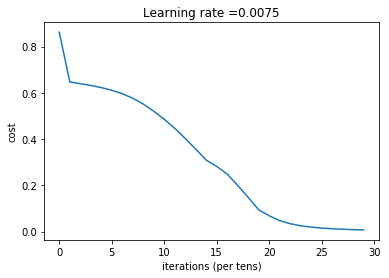

In [152]:
params = dnn_model(train_x, train_y, layer_dims, num_itera = 3000, learning_rate = 0.0075, print_cost = True)
# 如果出现Cost不下降的问题， 就说明可能出现了梯度消失，这时要考虑 参数初始化的问题。

In [153]:
def predict(X, Y, params):
    AL, caches = forward_prop(X, params)
    pred = (AL > 0.5)
    
    acc = np.mean(pred == Y)
    print("Accuracy: %f" % acc)
    return pred

In [154]:
pred_train = predict(train_x, train_y, params)

Accuracy: 1.000000


In [155]:
pred_test = predict(test_x, test_y, params)

Accuracy: 0.680000


Accuracy: 1.000000
[[ True]]
y = True, your L-layer model predicts a "cat" picture.


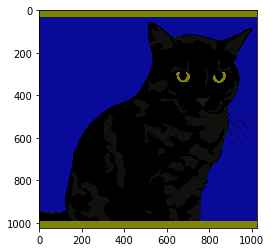

In [94]:
## START CODE HERE ##
my_image = "black_cat.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, params)
print(my_predicted_image)
plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [ ]:
np.mean(True == 1)